In [1]:
##################
### Author: Adriano Fonzino. email: adriano.fonzino@uniba.it
##################
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          path=None):
    '''
    ###############################################################################################
    CITATION: taken from: https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
    ###############################################################################################
    
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sn.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    
    if path:
        plt.tight_layout()
        plt.savefig(path)


# plot different version of consensus graphs
def create_sequence_logo(df, color_scheme=None, ax=None, title=None):
    '''
    Produce Consensus plot.
    '''
    if color_scheme == None:
        color_scheme={"*":"black",
                      "T": "red",
                      "A":"green",
                      "C":"blue",
                      "G":"orange"}
    else:
        color_scheme = color_scheme
    
    if ax == None:
        crp_logo = logomaker.Logo(df,
                                  shade_below=.5,
                                  fade_below=.5,
                                  font_name='Arial Rounded MT Bold', 
                                  color_scheme=color_scheme)
        # style using Logo methods
        crp_logo.style_spines(visible=False)
        crp_logo.style_spines(spines=['left', 'bottom'], visible=True)

        # style using Axes methods
        crp_logo.ax.set_ylabel("Frequency", labelpad=-1)
        crp_logo.ax.xaxis.set_ticks_position('none')
        crp_logo.ax.xaxis.set_tick_params(pad=-1)
        plt.title(title)

In [2]:
output_folder = "/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_pecori"

## OvEs vs KOs

In [3]:
# load predictions and bonafide OvE1/KO1
wt1_preds = pd.read_table(os.path.join(output_folder, "outTable_530905096_predictions.txt"))
print(wt1_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_pecori/HEK_ADAR1_p110_wt_1.OvE.outTable_530905096.gz_vs_HEK293T_KO1.KO.outTable_905657585.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko1_preds = pd.read_table(os.path.join(output_folder, "outTable_905657585_predictions.txt"))
print(ko1_preds.shape)
wt1_preds = pd.merge(bonafide, wt1_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(wt1_preds.shape)
ko1_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko1_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(ko1_preds.shape)
couple1_preds = pd.concat([wt1_preds, ko1_preds], ignore_index=True)
couple1_preds["Predicted_Class_binary"] = [1 if i=="Editing" else 0 for i in couple1_preds["Predicted_Class"]]
couple1_preds["couple"] = "couple1"
couple1_preds

(29211, 15)
(39397, 38)
(5265, 15)
(13957, 53)
(1570, 53)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,299493,A,1,383,46.11,"[372, 0, 11, 0]",AG,0.03,chrX,...,"[372, 0, 11, 0]",299443,299543,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
1,chrX,299510,A,1,388,45.23,"[281, 0, 107, 0]",AG,0.28,chrX,...,"[281, 0, 107, 0]",299460,299560,0,[],7.152557e-07,9.999993e-01,Editing,1,couple1
2,chrX,299513,A,1,385,45.16,"[381, 0, 4, 0]",AG,0.01,chrX,...,"[381, 0, 4, 0]",299463,299563,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
3,chrX,299540,A,1,365,47.04,"[359, 0, 6, 0]",AG,0.02,chrX,...,"[359, 0, 6, 0]",299490,299590,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
4,chrX,299653,A,1,520,48.17,"[503, 0, 17, 0]",AG,0.03,chrX,...,"[503, 0, 17, 0]",299603,299703,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15522,chr8,144289233,A,0,3449,52.75,"[0, 0, 3449, 0]",AG,1.00,chr8,...,"[0, 0, 1331, 0]",144289183,144289283,0,[],1.000000e+00,8.861037e-22,Not_Editing,0,couple1
15523,chr8,144315198,A,0,121,46.99,"[102, 0, 19, 0]",AG,0.16,chr8,...,"[42, 0, 8, 0]",144315148,144315248,0,[],6.920644e-01,3.079356e-01,Not_Editing,0,couple1
15524,chr8,144440133,A,0,863,53.18,"[1, 0, 862, 0]",AG,1.00,chr8,...,"[0, 0, 462, 0]",144440083,144440183,0,[],1.000000e+00,8.120080e-25,Not_Editing,0,couple1
15525,chr8,144451628,A,0,299,51.34,"[244, 0, 55, 0]",AG,0.18,chr8,...,"[137, 0, 16, 0]",144451578,144451678,0,[],2.384186e-07,9.999998e-01,Editing,1,couple1


In [4]:
# load predictions and bonafide OvE2/KO2
wt2_preds = pd.read_table(os.path.join(output_folder, "outTable_814257267_predictions.txt"))
print(wt2_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_pecori/HEK_ADAR1_p110_wt_2.OvE.outTable_814257267.gz_vs_HEK293T_KO2.KO.outTable_364841872.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko2_preds = pd.read_table(os.path.join(output_folder, "outTable_364841872_predictions.txt"))
print(ko2_preds.shape)
wt2_preds = pd.merge(bonafide, wt2_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(wt2_preds.shape)
ko2_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko2_preds, 
                     left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(ko2_preds.shape)
couple2_preds = pd.concat([wt2_preds, ko2_preds], ignore_index=True)
couple2_preds["Predicted_Class_binary"] = [1 if i=="Editing" else 0 for i in couple2_preds["Predicted_Class"]]
couple2_preds["couple"] = "couple2"
couple2_preds

(28704, 15)
(37415, 38)
(5266, 15)
(13554, 53)
(1638, 53)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,299493,A,1,324,45.15,"[320, 0, 4, 0]",AG,0.01,chrX,...,"[320, 0, 4, 0]",299443,299543,0,[],0.000000,1.000000e+00,Editing,1,couple2
1,chrX,299510,A,1,318,45.16,"[236, 0, 82, 0]",AG,0.26,chrX,...,"[236, 0, 82, 0]",299460,299560,0,[],0.001118,9.988816e-01,Editing,1,couple2
2,chrX,299513,A,1,314,45.80,"[305, 0, 9, 0]",AG,0.03,chrX,...,"[305, 0, 9, 0]",299463,299563,0,[],0.000000,1.000000e+00,Editing,1,couple2
3,chrX,299543,A,1,303,45.42,"[294, 0, 9, 0]",AG,0.03,chrX,...,"[294, 0, 9, 0]",299493,299593,0,[],0.000000,1.000000e+00,Editing,1,couple2
4,chrX,299659,A,1,450,49.49,"[443, 0, 7, 0]",AG,0.02,chrX,...,"[443, 0, 7, 0]",299609,299709,0,[],0.000000,1.000000e+00,Editing,1,couple2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15187,chr8,144440133,A,0,695,52.76,"[0, 0, 695, 0]",AG,1.00,chr8,...,"[3, 0, 528, 0]",144440083,144440183,0,[],1.000000,9.935234e-26,Not_Editing,0,couple2
15188,chr8,144451628,A,0,276,48.17,"[219, 0, 57, 0]",AG,0.21,chr8,...,"[144, 0, 40, 0]",144451578,144451678,0,[],0.999887,1.126294e-04,Not_Editing,0,couple2
15189,chr8,144457131,A,0,90,46.32,"[11, 0, 79, 0]",AG,0.88,chr8,...,"[11, 0, 55, 0]",144457081,144457181,0,[],0.999996,4.175997e-06,Not_Editing,0,couple2
15190,chr8,144458636,A,0,95,51.41,"[73, 0, 22, 0]",AG,0.23,chr8,...,"[49, 0, 9, 0]",144458586,144458686,0,[],0.000005,9.999952e-01,Editing,1,couple2


In [5]:
# load predictions and bonafide OvE3/KO3
wt3_preds = pd.read_table(os.path.join(output_folder, "outTable_208420383_predictions.txt"))
print(wt3_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_pecori/HEK_ADAR1_p110_wt_3.OvE.outTable_208420383.gz_vs_HEK293T_KO3.KO.outTable_597789462.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko3_preds = pd.read_table(os.path.join(output_folder, "outTable_597789462_predictions.txt"))
print(ko3_preds.shape)
wt3_preds = pd.merge(bonafide, wt3_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(wt3_preds.shape)
ko3_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko3_preds, 
                     left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(ko3_preds.shape)
couple3_preds = pd.concat([wt3_preds, ko3_preds], ignore_index=True)
couple3_preds["Predicted_Class_binary"] = [1 if i=="Editing" else 0 for i in couple3_preds["Predicted_Class"]]
couple3_preds["couple"] = "couple3"
couple3_preds

(23605, 15)
(35223, 38)
(4943, 15)
(12860, 53)
(1609, 53)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,299510,A,1,297,46.47,"[222, 0, 75, 0]",AG,0.25,chrX,...,"[222, 0, 75, 0]",299460,299560,0,[],0.000000e+00,1.000000e+00,Editing,1,couple3
1,chrX,299513,A,1,292,46.71,"[287, 0, 5, 0]",AG,0.02,chrX,...,"[287, 0, 5, 0]",299463,299563,0,[],0.000000e+00,1.000000e+00,Editing,1,couple3
2,chrX,299653,A,1,429,49.88,"[421, 0, 8, 0]",AG,0.02,chrX,...,"[421, 0, 8, 0]",299603,299703,0,[],0.000000e+00,1.000000e+00,Editing,1,couple3
3,chrX,299669,A,1,388,50.98,"[371, 0, 17, 0]",AG,0.04,chrX,...,"[371, 0, 17, 0]",299619,299719,0,[],0.000000e+00,1.000000e+00,Editing,1,couple3
4,chrX,299677,A,1,411,51.65,"[384, 0, 27, 0]",AG,0.07,chrX,...,"[384, 0, 27, 0]",299627,299727,0,[],0.000000e+00,1.000000e+00,Editing,1,couple3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14464,chr8,144440133,A,0,803,52.70,"[3, 0, 800, 0]",AG,1.00,chr8,...,"[0, 0, 442, 0]",144440083,144440183,0,[],1.000000e+00,3.500423e-23,Not_Editing,0,couple3
14465,chr8,144451628,A,0,311,50.45,"[251, 0, 60, 0]",AG,0.19,chr8,...,"[150, 0, 23, 0]",144451578,144451678,0,[],1.788139e-07,9.999998e-01,Editing,1,couple3
14466,chr8,144457131,A,0,52,46.96,"[14, 0, 38, 0]",AG,0.73,chr8,...,"[15, 0, 48, 0]",144457081,144457181,0,[],9.998286e-01,1.714183e-04,Not_Editing,0,couple3
14467,chr8,144458072,A,0,52,48.37,"[0, 0, 52, 0]",AG,1.00,chr8,...,"[0, 0, 54, 0]",144458022,144458122,0,[],1.000000e+00,2.084858e-20,Not_Editing,0,couple3


## WTs vs KOs

In [6]:
# load predictions and bonafide WT1/KO1
wt1_preds = pd.read_table(os.path.join(output_folder, "outTable_599710609_predictions.txt"))
print(wt1_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_pecori/HEK293T_WT1.WT.outTable_599710609.gz_vs_HEK293T_KO1.KO.outTable_905657585.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko1_preds = pd.read_table(os.path.join(output_folder, "outTable_905657585_predictions.txt"))
print(ko1_preds.shape)
wt1_preds = pd.merge(bonafide, wt1_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(wt1_preds.shape)
ko1_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko1_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(ko1_preds.shape)
couple4_preds = pd.concat([wt1_preds, ko1_preds], ignore_index=True)
couple4_preds["Predicted_Class_binary"] = [1 if i=="Editing" else 0 for i in couple4_preds["Predicted_Class"]]
couple4_preds["couple"] = "couple4"
couple4_preds

(23062, 15)
(29548, 38)
(5265, 15)
(10109, 53)
(1572, 53)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,299493,A,1,371,44.71,"[365, 0, 6, 0]",AG,0.02,chrX,...,"[365, 0, 6, 0]",299443,299543,0,[],0.000000e+00,1.000000e+00,Editing,1,couple4
1,chrX,299510,A,1,367,44.73,"[332, 0, 35, 0]",AG,0.10,chrX,...,"[332, 0, 35, 0]",299460,299560,0,[],0.000000e+00,1.000000e+00,Editing,1,couple4
2,chrX,299513,A,1,367,44.63,"[356, 0, 11, 0]",AG,0.03,chrX,...,"[356, 0, 11, 0]",299463,299563,0,[],0.000000e+00,1.000000e+00,Editing,1,couple4
3,chrX,299540,A,1,361,46.97,"[356, 0, 5, 0]",AG,0.01,chrX,...,"[356, 0, 5, 0]",299490,299590,0,[],0.000000e+00,1.000000e+00,Editing,1,couple4
4,chrX,299653,A,1,546,50.19,"[532, 0, 14, 0]",AG,0.03,chrX,...,"[532, 0, 14, 0]",299603,299703,0,[],0.000000e+00,1.000000e+00,Editing,1,couple4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,chr8,143992718,A,1,6316,50.88,"[1, 0, 6315, 0]",AG,1.00,chr8,...,"[0, 0, 3013, 0]",143992668,143992768,0,[],1.000000e+00,5.168597e-11,Not_Editing,0,couple4
11677,chr8,144315198,A,0,120,50.45,"[95, 0, 25, 0]",AG,0.21,chr8,...,"[42, 0, 8, 0]",144315148,144315248,0,[],6.920644e-01,3.079356e-01,Not_Editing,0,couple4
11678,chr8,144440133,A,0,1588,46.55,"[7, 0, 1581, 0]",AG,1.00,chr8,...,"[0, 0, 462, 0]",144440083,144440183,0,[],1.000000e+00,8.120080e-25,Not_Editing,0,couple4
11679,chr8,144451628,A,0,550,47.21,"[430, 0, 120, 0]",AG,0.22,chr8,...,"[137, 0, 16, 0]",144451578,144451678,0,[],2.384186e-07,9.999998e-01,Editing,1,couple4


In [7]:
# load predictions and bonafide WT2/KO2
wt2_preds = pd.read_table(os.path.join(output_folder, "outTable_572868058_predictions.txt"))
print(wt2_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_pecori/HEK293T_WT2.WT.outTable_572868058.gz_vs_HEK293T_KO2.KO.outTable_364841872.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko2_preds = pd.read_table(os.path.join(output_folder, "outTable_364841872_predictions.txt"))
print(ko2_preds.shape)
wt2_preds = pd.merge(bonafide, wt2_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(wt2_preds.shape)
ko2_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko2_preds, 
                     left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(ko2_preds.shape)
couple5_preds = pd.concat([wt2_preds, ko2_preds], ignore_index=True)
couple5_preds["Predicted_Class_binary"] = [1 if i=="Editing" else 0 for i in couple5_preds["Predicted_Class"]]
couple5_preds["couple"] = "couple5"
couple5_preds

(15794, 15)
(23787, 38)
(5266, 15)
(8511, 53)
(1629, 53)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,299510,A,1,272,43.13,"[239, 0, 33, 0]",AG,0.12,chrX,...,"[239, 0, 33, 0]",299460,299560,0,[],0.000000,1.000000e+00,Editing,1,couple5
1,chrX,299513,A,1,263,43.09,"[257, 0, 6, 0]",AG,0.02,chrX,...,"[257, 0, 6, 0]",299463,299563,0,[],0.000000,1.000000e+00,Editing,1,couple5
2,chrX,299540,A,1,291,44.30,"[288, 0, 3, 0]",AG,0.01,chrX,...,"[288, 0, 3, 0]",299490,299590,0,[],0.000000,1.000000e+00,Editing,1,couple5
3,chrX,299659,A,1,404,47.04,"[398, 0, 6, 0]",AG,0.01,chrX,...,"[398, 0, 6, 0]",299609,299709,0,[],0.000000,1.000000e+00,Editing,1,couple5
4,chrX,299663,A,1,430,47.44,"[402, 0, 28, 0]",AG,0.07,chrX,...,"[402, 0, 28, 0]",299613,299713,0,[],0.000000,1.000000e+00,Editing,1,couple5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,chr8,144440133,A,0,1284,47.59,"[2, 0, 1282, 0]",AG,1.00,chr8,...,"[3, 0, 528, 0]",144440083,144440183,0,[],1.000000,9.935234e-26,Not_Editing,0,couple5
10136,chr8,144451628,A,0,478,46.60,"[402, 0, 76, 0]",AG,0.16,chr8,...,"[144, 0, 40, 0]",144451578,144451678,0,[],0.999887,1.126294e-04,Not_Editing,0,couple5
10137,chr8,144457131,A,0,78,45.86,"[20, 0, 58, 0]",AG,0.74,chr8,...,"[11, 0, 55, 0]",144457081,144457181,0,[],0.999996,4.175997e-06,Not_Editing,0,couple5
10138,chr8,144458636,A,0,90,44.97,"[77, 0, 13, 0]",AG,0.14,chr8,...,"[49, 0, 9, 0]",144458586,144458686,0,[],0.000005,9.999952e-01,Editing,1,couple5


In [8]:
# load predictions and bonafide WT3/KO3
wt3_preds = pd.read_table(os.path.join(output_folder, "outTable_110067244_predictions.txt"))
print(wt3_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_pecori/HEK293T_WT3.WT.outTable_110067244.gz_vs_HEK293T_KO3.KO.outTable_597789462.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko3_preds = pd.read_table(os.path.join(output_folder, "outTable_597789462_predictions.txt"))
print(ko3_preds.shape)
wt3_preds = pd.merge(bonafide, wt3_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(wt3_preds.shape)
ko3_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko3_preds, 
                     left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(ko3_preds.shape)
couple6_preds = pd.concat([wt3_preds, ko3_preds], ignore_index=True)
couple6_preds["Predicted_Class_binary"] = [1 if i=="Editing" else 0 for i in couple6_preds["Predicted_Class"]]
couple6_preds["couple"] = "couple6"
couple6_preds

(10159, 15)
(20031, 38)
(4943, 15)
(7053, 53)
(1521, 53)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,299510,A,1,144,45.65,"[121, 0, 23, 0]",AG,0.16,chrX,...,"[121, 0, 23, 0]",299460,299560,0,[],0.000000e+00,1.000000e+00,Editing,1,couple6
1,chrX,299659,A,1,187,50.45,"[179, 0, 8, 0]",AG,0.04,chrX,...,"[179, 0, 8, 0]",299609,299709,0,[],0.000000e+00,1.000000e+00,Editing,1,couple6
2,chrX,299669,A,1,187,49.74,"[180, 0, 7, 0]",AG,0.04,chrX,...,"[180, 0, 7, 0]",299619,299719,0,[],0.000000e+00,1.000000e+00,Editing,1,couple6
3,chrX,299677,A,1,215,53.57,"[206, 0, 9, 0]",AG,0.04,chrX,...,"[206, 0, 9, 0]",299627,299727,0,[],0.000000e+00,1.000000e+00,Editing,1,couple6
4,chrX,299702,A,1,222,51.01,"[219, 0, 3, 0]",AG,0.01,chrX,...,"[219, 0, 3, 0]",299652,299752,0,[],0.000000e+00,1.000000e+00,Editing,1,couple6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8569,chr8,143917935,A,0,257,43.86,"[0, 0, 257, 0]",AG,1.00,chr8,...,"[0, 0, 286, 0]",143917885,143917985,0,[],1.000000e+00,9.395731e-26,Not_Editing,0,couple6
8570,chr8,144289233,A,0,1690,53.04,"[0, 0, 1690, 0]",AG,1.00,chr8,...,"[0, 0, 1471, 0]",144289183,144289283,0,[],1.000000e+00,4.007945e-23,Not_Editing,0,couple6
8571,chr8,144440133,A,0,509,47.75,"[1, 0, 508, 0]",AG,1.00,chr8,...,"[0, 0, 442, 0]",144440083,144440183,0,[],1.000000e+00,3.500423e-23,Not_Editing,0,couple6
8572,chr8,144451628,A,0,220,49.34,"[169, 0, 51, 0]",AG,0.23,chr8,...,"[150, 0, 23, 0]",144451578,144451678,0,[],1.788139e-07,9.999998e-01,Editing,1,couple6


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,299493,A,1,383,46.11,"[372, 0, 11, 0]",AG,0.03,chrX,...,"[372, 0, 11, 0]",299443,299543,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
1,chrX,299510,A,1,388,45.23,"[281, 0, 107, 0]",AG,0.28,chrX,...,"[281, 0, 107, 0]",299460,299560,0,[],7.152557e-07,9.999993e-01,Editing,1,couple1
2,chrX,299513,A,1,385,45.16,"[381, 0, 4, 0]",AG,0.01,chrX,...,"[381, 0, 4, 0]",299463,299563,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
3,chrX,299540,A,1,365,47.04,"[359, 0, 6, 0]",AG,0.02,chrX,...,"[359, 0, 6, 0]",299490,299590,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
4,chrX,299653,A,1,520,48.17,"[503, 0, 17, 0]",AG,0.03,chrX,...,"[503, 0, 17, 0]",299603,299703,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8569,chr8,143917935,A,0,257,43.86,"[0, 0, 257, 0]",AG,1.00,chr8,...,"[0, 0, 286, 0]",143917885,143917985,0,[],1.000000e+00,9.395731e-26,Not_Editing,0,couple6
8570,chr8,144289233,A,0,1690,53.04,"[0, 0, 1690, 0]",AG,1.00,chr8,...,"[0, 0, 1471, 0]",144289183,144289283,0,[],1.000000e+00,4.007945e-23,Not_Editing,0,couple6
8571,chr8,144440133,A,0,509,47.75,"[1, 0, 508, 0]",AG,1.00,chr8,...,"[0, 0, 442, 0]",144440083,144440183,0,[],1.000000e+00,3.500423e-23,Not_Editing,0,couple6
8572,chr8,144451628,A,0,220,49.34,"[169, 0, 51, 0]",AG,0.23,chr8,...,"[150, 0, 23, 0]",144451578,144451678,0,[],1.788139e-07,9.999998e-01,Editing,1,couple6


wt_sample                                      ko_sample                           
HEK_ADAR1_p110_wt_1.OvE.outTable_530905096.gz  HEK293T_KO1.KO.outTable_905657585.gz    15527
HEK_ADAR1_p110_wt_2.OvE.outTable_814257267.gz  HEK293T_KO2.KO.outTable_364841872.gz    15192
HEK_ADAR1_p110_wt_3.OvE.outTable_208420383.gz  HEK293T_KO3.KO.outTable_597789462.gz    14469
HEK293T_WT1.WT.outTable_599710609.gz           HEK293T_KO1.KO.outTable_905657585.gz    11681
HEK293T_WT2.WT.outTable_572868058.gz           HEK293T_KO2.KO.outTable_364841872.gz    10140
HEK293T_WT3.WT.outTable_110067244.gz           HEK293T_KO3.KO.outTable_597789462.gz     8574
dtype: int64
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     19341
           1       0.98      0.98      0.98     56242

    accuracy                           0.97     75583
   macro avg       0.96      0.96      0.96     75583
weighted avg       0.97      0.97      0.97     75583

Accuracy: 0.967823

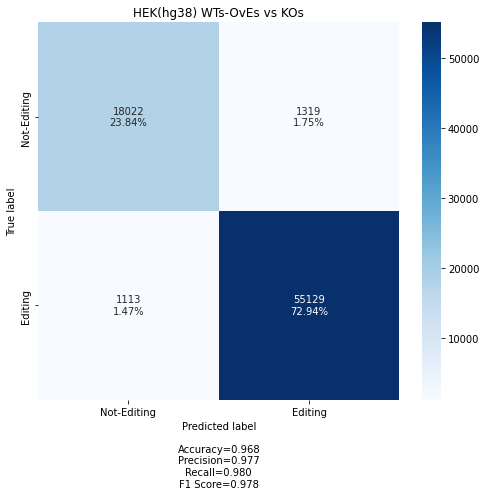

In [9]:
# merge prediction into a unique list
merged_preds = pd.concat([couple1_preds, couple2_preds, couple3_preds,
                          couple4_preds, couple5_preds, couple6_preds], axis=0)
# save to disk full predictions
merged_preds.to_csv(os.path.join(output_folder, "MERGED_PREDS.tsv"), sep="\t", index=None)
display(merged_preds)
print(merged_preds[["wt_sample", "ko_sample"]].value_counts())
# merged
print(classification_report(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
print("Accuracy:", accuracy_score(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
print("Balanced Accuracy:", balanced_accuracy_score(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
print("Precision:", precision_score(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
print("Recall:", recall_score(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
print("F1-score", f1_score(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
cm = confusion_matrix(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values)
print(cm)
# confusion matrix
make_confusion_matrix(cf=cm,
                          group_names=None,
                          categories=["Not-Editing", "Editing"],
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(7,7),
                          cmap='Blues',
                          title="HEK(hg38) WTs-OvEs vs KOs",
                          path=os.path.join(output_folder, "ConfMatr_WTs_OvEs_vs_KOs.tiff"))

,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,299493,A,1,383,46.11,"[372, 0, 11, 0]",AG,0.03,chrX,...,"[372, 0, 11, 0]",299443,299543,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
1,chrX,299510,A,1,388,45.23,"[281, 0, 107, 0]",AG,0.28,chrX,...,"[281, 0, 107, 0]",299460,299560,0,[],7.152557e-07,9.999993e-01,Editing,1,couple1
2,chrX,299513,A,1,385,45.16,"[381, 0, 4, 0]",AG,0.01,chrX,...,"[381, 0, 4, 0]",299463,299563,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
3,chrX,299540,A,1,365,47.04,"[359, 0, 6, 0]",AG,0.02,chrX,...,"[359, 0, 6, 0]",299490,299590,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
4,chrX,299653,A,1,520,48.17,"[503, 0, 17, 0]",AG,0.03,chrX,...,"[503, 0, 17, 0]",299603,299703,0,[],0.000000e+00,1.000000e+00,Editing,1,couple1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14464,chr8,144440133,A,0,803,52.70,"[3, 0, 800, 0]",AG,1.00,chr8,...,"[0, 0, 442, 0]",144440083,144440183,0,[],1.000000e+00,3.500423e-23,Not_Editing,0,couple3
14465,chr8,144451628,A,0,311,50.45,"[251, 0, 60, 0]",AG,0.19,chr8,...,"[150, 0, 23, 0]",144451578,144451678,0,[],1.788139e-07,9.999998e-01,Editing,1,couple3
14466,chr8,144457131,A,0,52,46.96,"[14, 0, 38, 0]",AG,0.73,chr8,...,"[15, 0, 48, 0]",144457081,144457181,0,[],9.998286e-01,1.714183e-04,Not_Editing,0,couple3
14467,chr8,144458072,A,0,52,48.37,"[0, 0, 52, 0]",AG,1.00,chr8,...,"[0, 0, 54, 0]",144458022,144458122,0,[],1.000000e+00,2.084858e-20,Not_Editing,0,couple3


wt_sample                                      ko_sample                           
HEK_ADAR1_p110_wt_1.OvE.outTable_530905096.gz  HEK293T_KO1.KO.outTable_905657585.gz    15527
HEK_ADAR1_p110_wt_2.OvE.outTable_814257267.gz  HEK293T_KO2.KO.outTable_364841872.gz    15192
HEK_ADAR1_p110_wt_3.OvE.outTable_208420383.gz  HEK293T_KO3.KO.outTable_597789462.gz    14469
dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9752
           1       0.98      0.98      0.98     35436

    accuracy                           0.97     45188
   macro avg       0.95      0.96      0.96     45188
weighted avg       0.97      0.97      0.97     45188

Accuracy: 0.9696158272107639
Balanced Accuracy: 0.9561003969674939
Precision: 0.981346974535794
Recall: 0.979879218873462
F1-score 0.9806125474801959
[[ 9092   660]
 [  713 34723]]


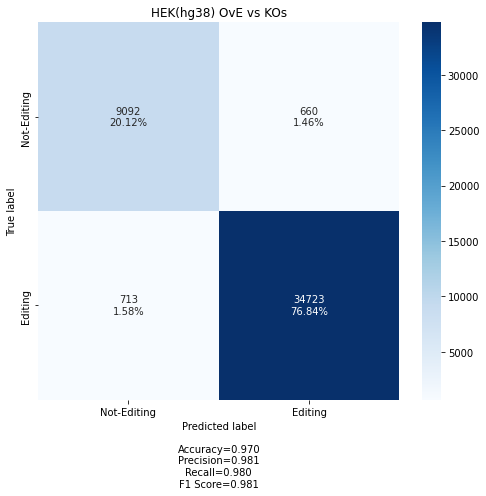

In [10]:
# MERGED PREDS: OvEs vs KOs
merged_preds_ove_vs_ko = pd.concat([couple1_preds, couple2_preds, couple3_preds], axis=0)
# save to disk full predictions
merged_preds_ove_vs_ko.to_csv(os.path.join(output_folder, "MERGED_PREDS_OvEs_vs_KOs.tsv"), sep="\t", index=None)
display(merged_preds_ove_vs_ko)
print(merged_preds_ove_vs_ko[["wt_sample", "ko_sample"]].value_counts())
# merged
print(classification_report(merged_preds_ove_vs_ko["Class_binary"].values, merged_preds_ove_vs_ko["Predicted_Class_binary"].values))
print("Accuracy:", accuracy_score(merged_preds_ove_vs_ko["Class_binary"].values, merged_preds_ove_vs_ko["Predicted_Class_binary"].values))
print("Balanced Accuracy:", balanced_accuracy_score(merged_preds_ove_vs_ko["Class_binary"].values, merged_preds_ove_vs_ko["Predicted_Class_binary"].values))
print("Precision:", precision_score(merged_preds_ove_vs_ko["Class_binary"].values, merged_preds_ove_vs_ko["Predicted_Class_binary"].values))
print("Recall:", recall_score(merged_preds_ove_vs_ko["Class_binary"].values, merged_preds_ove_vs_ko["Predicted_Class_binary"].values))
print("F1-score", f1_score(merged_preds_ove_vs_ko["Class_binary"].values, merged_preds_ove_vs_ko["Predicted_Class_binary"].values))
cm = confusion_matrix(merged_preds_ove_vs_ko["Class_binary"].values, merged_preds_ove_vs_ko["Predicted_Class_binary"].values)
print(cm)
# confusion matrix
make_confusion_matrix(cf=cm,
                          group_names=None,
                          categories=["Not-Editing", "Editing"],
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(7,7),
                          cmap='Blues',
                          title="HEK(hg38) OvE vs KOs",
                          path=os.path.join(output_folder, "ConfMatr_Ove_vs_KOs.tiff"))

,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,299493,A,1,371,44.71,"[365, 0, 6, 0]",AG,0.02,chrX,...,"[365, 0, 6, 0]",299443,299543,0,[],0.000000e+00,1.000000e+00,Editing,1,couple4
1,chrX,299510,A,1,367,44.73,"[332, 0, 35, 0]",AG,0.10,chrX,...,"[332, 0, 35, 0]",299460,299560,0,[],0.000000e+00,1.000000e+00,Editing,1,couple4
2,chrX,299513,A,1,367,44.63,"[356, 0, 11, 0]",AG,0.03,chrX,...,"[356, 0, 11, 0]",299463,299563,0,[],0.000000e+00,1.000000e+00,Editing,1,couple4
3,chrX,299540,A,1,361,46.97,"[356, 0, 5, 0]",AG,0.01,chrX,...,"[356, 0, 5, 0]",299490,299590,0,[],0.000000e+00,1.000000e+00,Editing,1,couple4
4,chrX,299653,A,1,546,50.19,"[532, 0, 14, 0]",AG,0.03,chrX,...,"[532, 0, 14, 0]",299603,299703,0,[],0.000000e+00,1.000000e+00,Editing,1,couple4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8569,chr8,143917935,A,0,257,43.86,"[0, 0, 257, 0]",AG,1.00,chr8,...,"[0, 0, 286, 0]",143917885,143917985,0,[],1.000000e+00,9.395731e-26,Not_Editing,0,couple6
8570,chr8,144289233,A,0,1690,53.04,"[0, 0, 1690, 0]",AG,1.00,chr8,...,"[0, 0, 1471, 0]",144289183,144289283,0,[],1.000000e+00,4.007945e-23,Not_Editing,0,couple6
8571,chr8,144440133,A,0,509,47.75,"[1, 0, 508, 0]",AG,1.00,chr8,...,"[0, 0, 442, 0]",144440083,144440183,0,[],1.000000e+00,3.500423e-23,Not_Editing,0,couple6
8572,chr8,144451628,A,0,220,49.34,"[169, 0, 51, 0]",AG,0.23,chr8,...,"[150, 0, 23, 0]",144451578,144451678,0,[],1.788139e-07,9.999998e-01,Editing,1,couple6


wt_sample                             ko_sample                           
HEK293T_WT1.WT.outTable_599710609.gz  HEK293T_KO1.KO.outTable_905657585.gz    11681
HEK293T_WT2.WT.outTable_572868058.gz  HEK293T_KO2.KO.outTable_364841872.gz    10140
HEK293T_WT3.WT.outTable_110067244.gz  HEK293T_KO3.KO.outTable_597789462.gz     8574
dtype: int64
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      9589
           1       0.97      0.98      0.97     20806

    accuracy                           0.97     30395
   macro avg       0.96      0.96      0.96     30395
weighted avg       0.97      0.97      0.97     30395

Accuracy: 0.9651587432143445
Balanced Accuracy: 0.9560250981292879
Precision: 0.9687158794208403
Recall: 0.9807747765067769
F1-score 0.9747080318119941
[[ 8930   659]
 [  400 20406]]


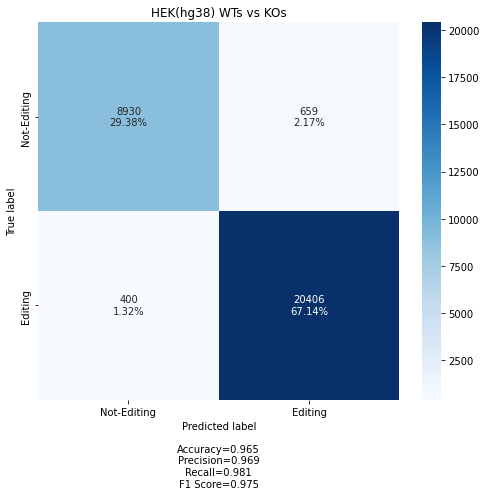

In [11]:
# MERGED PREDS: WTs vs KOs
merged_preds_wt_vs_ko = pd.concat([couple4_preds, couple5_preds, couple6_preds], axis=0)
# save to disk full predictions
merged_preds_wt_vs_ko.to_csv(os.path.join(output_folder, "MERGED_PREDS_WTs_vs_KOs.tsv"), sep="\t", index=None)
display(merged_preds_wt_vs_ko)
print(merged_preds_wt_vs_ko[["wt_sample", "ko_sample"]].value_counts())
# merged
print(classification_report(merged_preds_wt_vs_ko["Class_binary"].values, merged_preds_wt_vs_ko["Predicted_Class_binary"].values))
print("Accuracy:", accuracy_score(merged_preds_wt_vs_ko["Class_binary"].values, merged_preds_wt_vs_ko["Predicted_Class_binary"].values))
print("Balanced Accuracy:", balanced_accuracy_score(merged_preds_wt_vs_ko["Class_binary"].values, merged_preds_wt_vs_ko["Predicted_Class_binary"].values))
print("Precision:", precision_score(merged_preds_wt_vs_ko["Class_binary"].values, merged_preds_wt_vs_ko["Predicted_Class_binary"].values))
print("Recall:", recall_score(merged_preds_wt_vs_ko["Class_binary"].values, merged_preds_wt_vs_ko["Predicted_Class_binary"].values))
print("F1-score", f1_score(merged_preds_wt_vs_ko["Class_binary"].values, merged_preds_wt_vs_ko["Predicted_Class_binary"].values))
cm = confusion_matrix(merged_preds_wt_vs_ko["Class_binary"].values, merged_preds_wt_vs_ko["Predicted_Class_binary"].values)
print(cm)
# confusion matrix
make_confusion_matrix(cf=cm,
                          group_names=None,
                          categories=["Not-Editing", "Editing"],
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(7,7),
                          cmap='Blues',
                          title="HEK(hg38) WTs vs KOs",
                          path=os.path.join(output_folder, "ConfMatr_WTs_vs_KOs.tiff"))